In [608]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [609]:
# Reading and Storing the data in pandas Dataframe
car_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
pd.read_csv(car_data, header=None)
headers = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df_car = pd.read_csv(car_data, names=headers)
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Exploring the data 

In [610]:
# Exploring the data for possible num values
print(df_car.shape)

(1728, 7)


In [611]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [612]:
df_car["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [613]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Data Preprocessing

In [614]:
# Selecting features and the targets in X and Y
X = df_car.iloc[:,:-1]
y = df_car["class"]

In [615]:
# Applying Label Encoding on the Categorical Features
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [616]:
X_encoded

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


# Model Training

In [617]:
# Train Test Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

In [618]:
# Making the object of the model
dt_clf = DecisionTreeClassifier()

In [619]:
# Fitting the training samples in the model
dt_clf = dt_clf.fit(X_train, y_train)

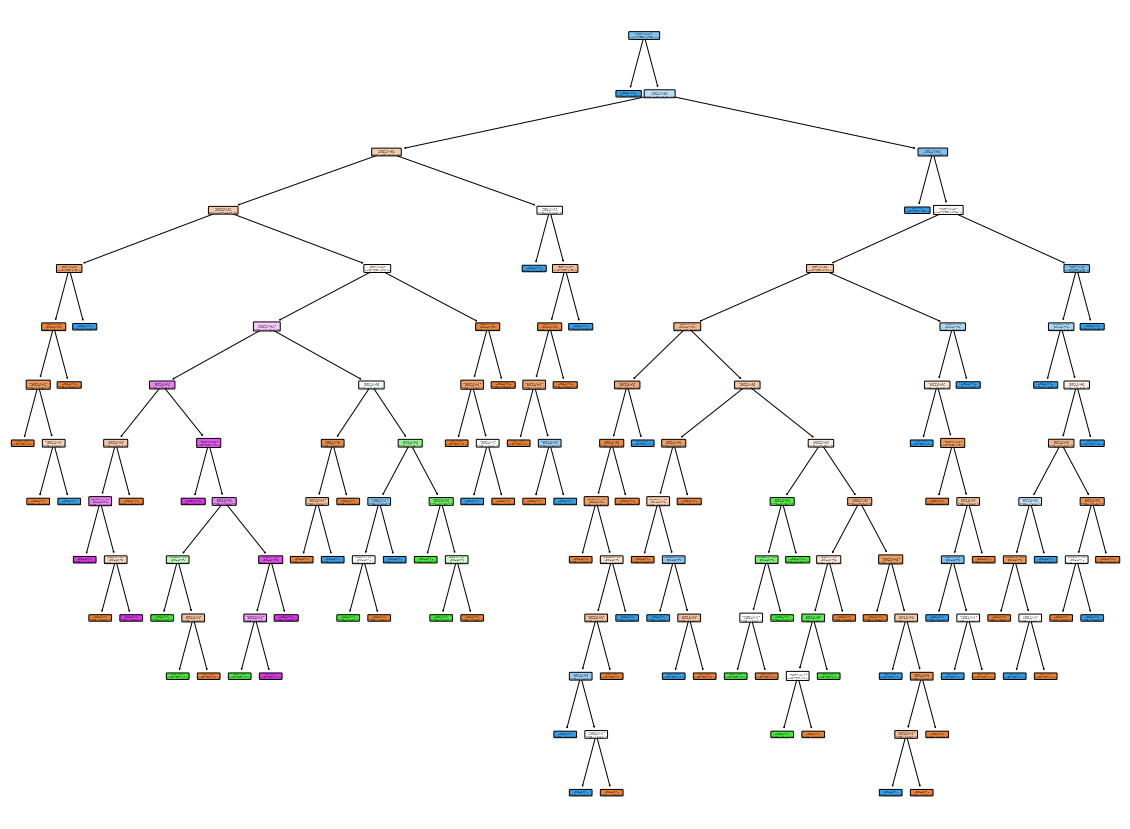

In [620]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=["unacc", "acc", "good", "vgood"],
         feature_names=X_train.columns);

In [621]:
# Testing the model
prediction = dt_clf.predict(X_test)

In [622]:
# Model Accuracy
print("Accuracy:", (prediction == y_test).mean())

Accuracy: 0.9807321772639692


In [623]:
# HyperParameter Selection for the Decision Tree
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
             }

In [624]:
# Apply GridSearchCV for hyper parameter selection
dt_optimized = GridSearchCV(dt_clf, param_grid, scoring='accuracy', cv=10, verbose=1)

In [625]:
dt_optimized.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=1)

In [626]:
dt_pred = dt_optimized.predict(X_test)

In [627]:
dt_optimized.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'random_state': 42}

In [628]:
print('CV Accuracy: %0.3f' % dt_optimized.best_score_)

CV Accuracy: 0.974


In [629]:
dt_optimized

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=1)

In [ ]:
dt_optimized.cv_results_

# Random Forest

In [631]:
# Checking with Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)

In [632]:
predictions = rf_clf.predict(X_test)

In [633]:
print("Accuracy:", (predictions == y_test).mean())

Accuracy: 0.976878612716763


In [634]:
# HyperParameter Selection Random Forest Classifier
param_grid = {'criterion':['gini', 'entropy'],
              'n_estimators':[x for x in range(1,110,10)]
             }

In [635]:
rf_optimized = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=10, verbose=1)

In [636]:
rf_optimized.fit(X_train, y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101]},
             scoring='accuracy', verbose=1)

In [637]:
rf_pred = rf_optimized.predict(X_test)

In [638]:
rf_optimized.best_params_

{'criterion': 'gini', 'n_estimators': 81}

In [ ]:
rf_optimized.cv_results_

# PCA and LDA

In [640]:
# Applying PCA
pca = PCA(5)
pca.fit(X_train)

PCA(n_components=5)

In [641]:
print(pca.explained_variance_ratio_)

[0.22220684 0.21563817 0.21484083 0.12012749 0.11612808]


In [642]:
print(pca.explained_variance_)

[1.27498931 1.23729928 1.23272427 0.68927341 0.6663254 ]


In [643]:
pca_transform_X = pca.transform(X_train)

In [644]:
pca_transform_X_test = pca.transform(X_test)

In [645]:
decision_tree = DecisionTreeClassifier()

In [646]:
decision_tree.fit(pca_transform_X, y_train)

DecisionTreeClassifier()

In [647]:
y_pred = decision_tree.predict(pca_transform_X_test)

In [648]:
print("Accuracy with PCA: ",(y_pred == y_test).mean())

Accuracy with PCA:  0.8651252408477842


In [649]:
y_train.unique()

array(['unacc', 'vgood', 'acc', 'good'], dtype=object)

In [650]:
# Applying LDA Dimension Technique

In [651]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=3)

In [652]:
print(lda.explained_variance_ratio_)

[8.52876881e-01 1.46740765e-01 3.82354521e-04]


In [653]:
# apply the lda transformation
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [654]:
# Decision Tree
dt_lda = DecisionTreeClassifier()

In [655]:
dt_lda.fit(X_train_lda, y_train)

DecisionTreeClassifier()

In [656]:
lda_pred = dt_lda.predict(X_test_lda)

In [657]:
print("Accuracy with LDA: ", (lda_pred == y_test).mean())

Accuracy with LDA:  0.7764932562620424


# Plotting

In [711]:
train_accuracy_gini = []
test_accuracy_gini = []
train_accuracy_entropy = []
test_accuracy_entropy = []

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
             }

for keys in param_grid['criterion']:
    for values in param_grid['max_depth']:
        dt_clf = DecisionTreeClassifier(criterion=keys, max_depth=values)
        dt_clf = dt_clf.fit(X_train, y_train)
        dt_clf_train = dt_clf.predict(X_train)
        dt_clf_prediction = dt_clf.predict(X_test)
        train_accuracy = (dt_clf_train == y_train).mean() * 100
        test_accuracy = (dt_clf_prediction == y_test).mean() * 100
        if keys == 'gini':
            train_accuracy_gini.append(train_accuracy)
            test_accuracy_gini.append(test_accuracy)
        elif keys == 'entropy':
            train_accuracy_entropy.append(train_accuracy)
            test_accuracy_entropy.append(test_accuracy)

# Gini Train vs Test

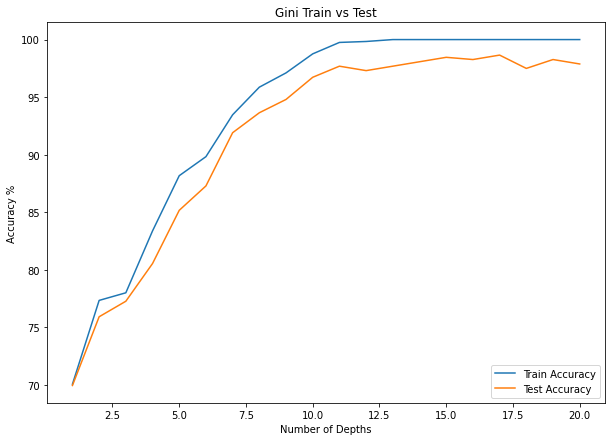

In [726]:
plt.figure(figsize=(10, 7))
plt.plot(param_grid["max_depth"], train_accuracy_gini, label="Train Accuracy")
plt.plot(param_grid["max_depth"], test_accuracy_gini, label="Test Accuracy")
plt.xlabel("Number of Depths")
plt.ylabel("Accuracy %")
plt.title("Gini Train vs Test")
plt.legend(loc="lower right")

# Entropy Train vs Test

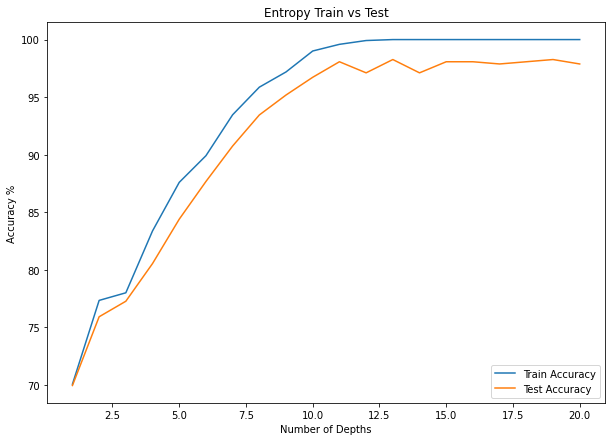

In [728]:
plt.figure(figsize=(10, 7))
plt.plot(param_grid["max_depth"], train_accuracy_entropy, label="Train Accuracy")
plt.plot(param_grid["max_depth"], test_accuracy_entropy, label="Test Accuracy")
plt.xlabel("Number of Depths")
plt.ylabel("Accuracy %")
plt.title("Entropy Train vs Test")
plt.legend(loc="lower right")